In [1]:
# packages
import os
import hsz
import numpy as np
from hsz import h
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

## Hamiltonian

In [4]:
# construct matrix
n_min = 20
n_max = 21
S = 1
ham_ML = hsz.Hamiltonian(n_min=n_min, n_max=n_max, S=S, basis_type='ml')
ham_MJ = hsz.Hamiltonian(n_min=n_min, n_max=n_max, S=S, basis_type='mj')
print('Number of ML basis states:', '%d'%ham_ML.num_states)
print('Number of MJ basis states:', '%d'%ham_MJ.num_states)

Number of ML basis states: 841
Number of MJ basis states: 2523


In [5]:
# calculate Stark map
Bfield=0.1
field_angle = 0.0
Efield = np.linspace(0.0, 1.0*10**3, 51) # V /cm
sm_ML = ham_ML.stark_map(Efield*1e2, Bfield=Bfield, 
                         field_angle=field_angle,
                         cache_matrices=False,
                         load_matrices=True,
                         save_matrices=True,
                         matrices_dir='saved_matrices')
sm_MJ = ham_MJ.stark_map(Efield*1e2, Bfield=Bfield, 
                         field_angle=field_angle,
                         cache_matrices=False,
                         load_matrices=True,
                         save_matrices=True,
                         matrices_dir='saved_matrices')

diagonalise Hamiltonian:   0%|          | 0/51 [00:00<?, ?it/s]

Loaded 'zeeman' matrix from, 
	 ./saved_matrices/zeeman_n=20-21_L_max=None_S=1_M=None_M_max=None_basis=ml.npz
Loaded 'stark' matrix from, 
	 ./saved_matrices/stark_n=20-21_L_max=None_S=1_M=None_M_max=None_basis=ml_angle=0.0.npz


Calculating stark terms:   0%|          | 0/2523 [00:00<?, ?it/s]

Saved 'zeeman' matrix from, 
	 ./saved_matrices/zeeman_n=20-21_L_max=None_S=1_M=None_M_max=None_basis=mj


diagonalise Hamiltonian:   0%|          | 0/51 [00:00<?, ?it/s]

Saved 'stark' matrix from, 
	 ./saved_matrices/stark_n=20-21_L_max=None_S=1_M=None_M_max=None_basis=mj_angle=0.0


diagonalise Hamiltonian: 100%|██████████| 51/51 [02:00<00:00,  2.36s/it]


## Plot

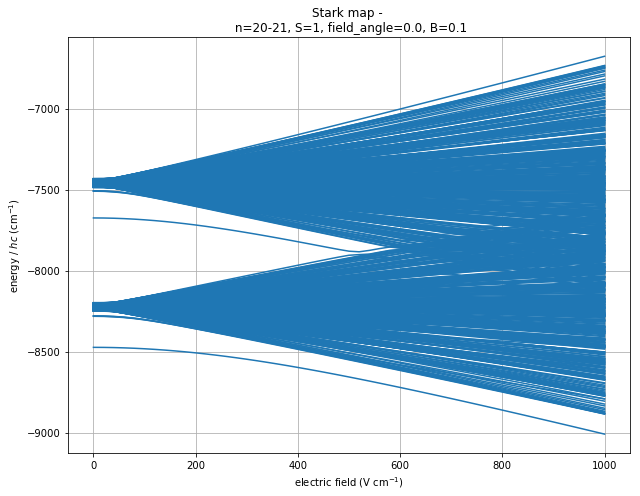

In [11]:
plt.figure(figsize=(9, 7))

plt.plot(Efield, sm_ML / (h*10**9), ls='-', c='tab:blue', alpha=1.0)
plt.plot(Efield, sm_MJ[:, ix] / (h*10**9), ls='--', c='tab:red', alpha=1.0)

# format
plt.xlabel('electric field (V cm$^{-1}$)')
plt.ylabel('energy / $h$ (GHz)')
plt.xlim(400, 600)
plt.ylim(-8000, -7800)

# output
plt.grid()
plt.title('Stark map - \n n={}-{}, S={}, field_angle={}, B={}'.format(
            n_min, n_max, S, field_angle, Bfield))
plt.tight_layout()

In [2]:
%load_ext version_information

In [3]:
%version_information scipy, numpy, sympy, numba, matplotlib, attr, tqdm ,version_information

Software,Version
Python,3.6.1 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython,5.3.0
OS,Darwin 17.4.0 x86_64 i386 64bit
scipy,1.0.0
numpy,1.14.3
sympy,1.0
numba,0.35.0
matplotlib,2.0.2
attr,17.4.0
tqdm,4.15.0
